In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/Unemployment in India.csv.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
df.columns = df.columns.str.strip()
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [ ]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 768 rows and 7 columns


In [ ]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [ ]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [ ]:
print("Mean Unemployment Rate : ", df["Estimated Unemployment Rate (%)"].mean())
print("Median Unemployment Rate : ", df["Estimated Unemployment Rate (%)"].median())
print("Standard deviation Unemployment Rate : ", df["Estimated Unemployment Rate (%)"].std())

Mean Unemployment Rate :  11.787945945945946
Median Unemployment Rate :  8.35
Standard deviation Unemployment Rate :  10.721298373157783


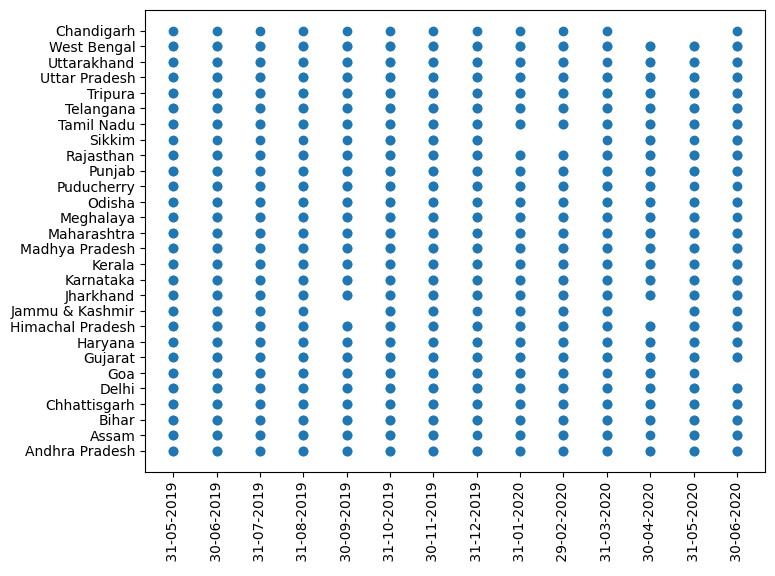

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Date"], df["Region"])
plt.xticks(rotation = "vertical")
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
unemployment_rate_over_time = df.groupby('Date')["Estimated Unemployment Rate (%)"].mean()

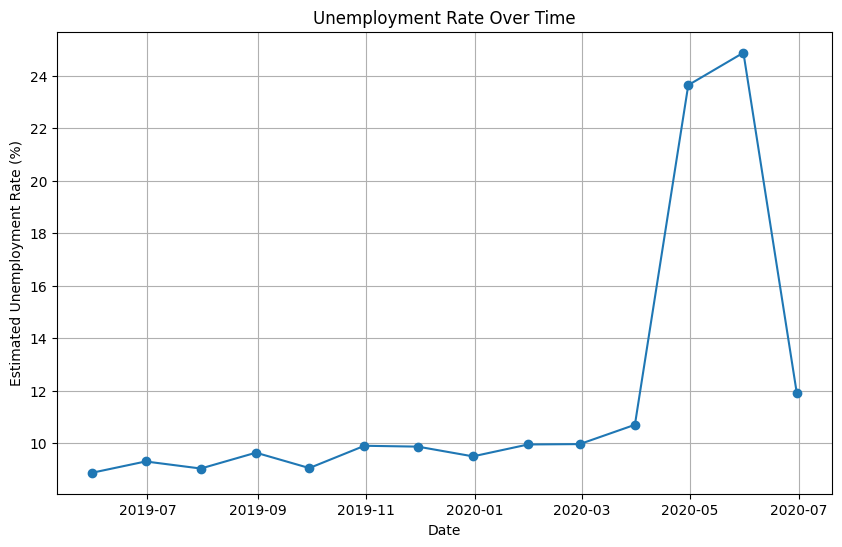

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(unemployment_rate_over_time.index, unemployment_rate_over_time.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

In [ ]:
import warnings

warnings.filterwarnings("ignore")

plt.show()

In [ ]:
df["Date"].unique()

<DatetimeArray>
['2019-05-31 00:00:00', '2019-06-30 00:00:00', '2019-07-31 00:00:00',
 '2019-08-31 00:00:00', '2019-09-30 00:00:00', '2019-10-31 00:00:00',
 '2019-11-30 00:00:00', '2019-12-31 00:00:00', '2020-01-31 00:00:00',
 '2020-02-29 00:00:00', '2020-03-31 00:00:00', '2020-04-30 00:00:00',
 '2020-05-31 00:00:00', '2020-06-30 00:00:00']
Length: 14, dtype: datetime64[ns]

In [ ]:
region_data = df["Region"].unique()
print("The Indian cities are:", end = " ")
for i in region_data[:-2]:
    print(i, end = " - ")
print(region_data[-1], ".", sep = "")

The Indian cities are: Andhra Pradesh - Assam - Bihar - Chhattisgarh - Delhi - Goa - Gujarat - Haryana - Himachal Pradesh - Jammu & Kashmir - Jharkhand - Karnataka - Kerala - Madhya Pradesh - Maharashtra - Meghalaya - Odisha - Puducherry - Punjab - Rajasthan - Sikkim - Tamil Nadu - Telangana - Tripura - Uttar Pradesh - Uttarakhand - Chandigarh.


In [ ]:
strt_date_data = df[df["Date"] == '2019-05-31 00:00:00']

MIN_unemployment_rate = strt_date_data.groupby('Region')["Estimated Unemployment Rate (%)"].mean()

In [ ]:
strt_date_data = df[df["Date"] == '2020-05-31 00:00:00']

MAX_unemployment_rate = strt_date_data.groupby('Region')["Estimated Unemployment Rate (%)"].mean()

In [ ]:
unemployment_df = pd.DataFrame({
    '2019-05-31': MIN_unemployment_rate,
    '2020-05-31': MAX_unemployment_rate
})

<Figure size 1000x600 with 0 Axes>

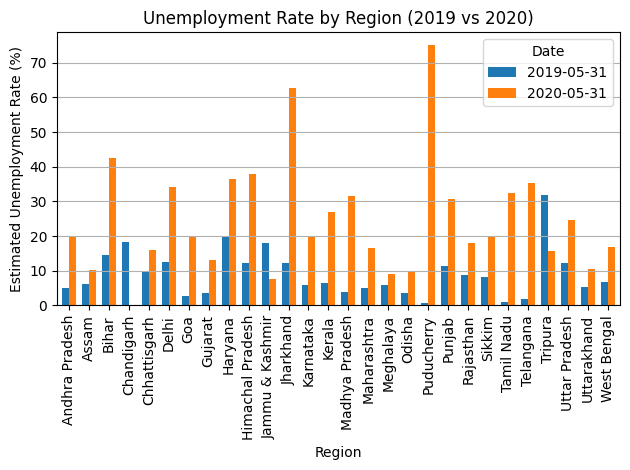

In [ ]:
plt.figure(figsize=(10, 6))
unemployment_df.plot(kind='bar', width=0.7)
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by Region (2019 vs 2020)')
plt.xticks(rotation="vertical")
plt.legend(title='Date')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

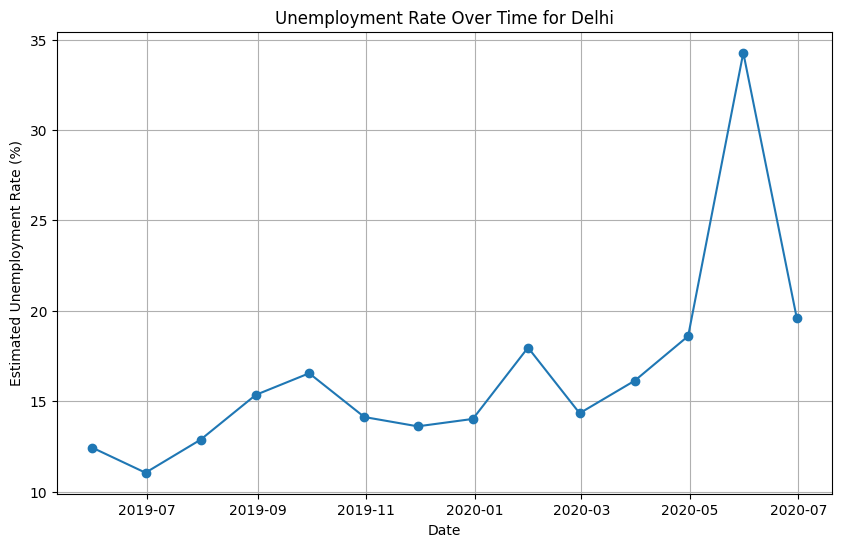

In [ ]:
region_df = df[df['Region'] == 'Delhi']

unemployment_rate_over_time = region_df.groupby('Date')["Estimated Unemployment Rate (%)"].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(unemployment_rate_over_time.index, unemployment_rate_over_time.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time for Delhi')

plt.grid(True)

plt.show()


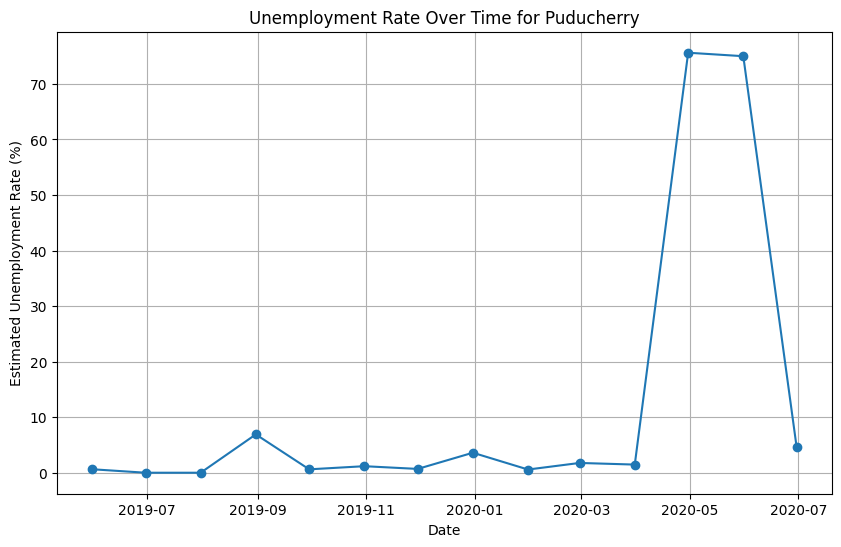

In [ ]:
region_df = df[df['Region'] == 'Puducherry']

unemployment_rate_over_time = region_df.groupby('Date')["Estimated Unemployment Rate (%)"].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(unemployment_rate_over_time.index, unemployment_rate_over_time.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time for Puducherry')
plt.grid(True)

plt.show()

In [ ]:

rural_data = df[df["Area"] == 'Rural']

rural_rate_over_time = rural_data.groupby('Date')["Estimated Unemployment Rate (%)"].mean()


urban_data = df[df["Area"] == 'Urban']

urban_rate_over_time = urban_data.groupby('Date')["Estimated Unemployment Rate (%)"].mean()

unemployment_df = pd.DataFrame({
    'Urban': urban_rate_over_time,
    'Rural': rural_rate_over_time
})

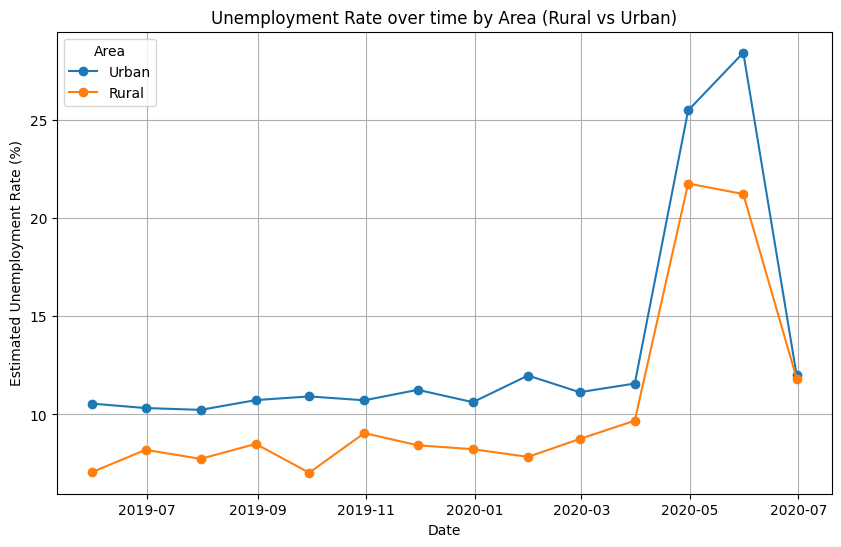

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(unemployment_df.index, unemployment_df['Urban'], marker='o', label='Urban')
plt.plot(unemployment_df.index, unemployment_df['Rural'], marker='o', label='Rural')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate over time by Area (Rural vs Urban)')
plt.legend(title='Area')
plt.grid(True)

plt.show()